In [2]:
# doing the necessary imports
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image", cmap="gray")
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['fft', 'random', 'power']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


consider a collection of points that are sampled from three diffrent densities, in this case normal densities with the same covariances but diffrent means

In [3]:
data = r_[10*randn(1000, 2) + array([70,30]),
         10*randn(1000, 2) + array([10,10]),
         10*randn(1000, 2) + array([50,80])]
data = data[pyrandom.sample(range(len(data)), len(data))]

In [6]:
data

array([[ 7.39890122, 25.66311193],
       [74.31221844, 21.86470622],
       [43.06996511, 97.73367302],
       ...,
       [85.81622389, 39.16537865],
       [ 9.78578147, 15.83769491],
       [40.5909147 , 65.72359777]])

here is a scatterplot of this data

we clearly see three clusters, corresponding to the three mixture components. How can we recover these clusters?

This is the job of clustering algorithms

In [9]:
data.shape

(3000, 2)

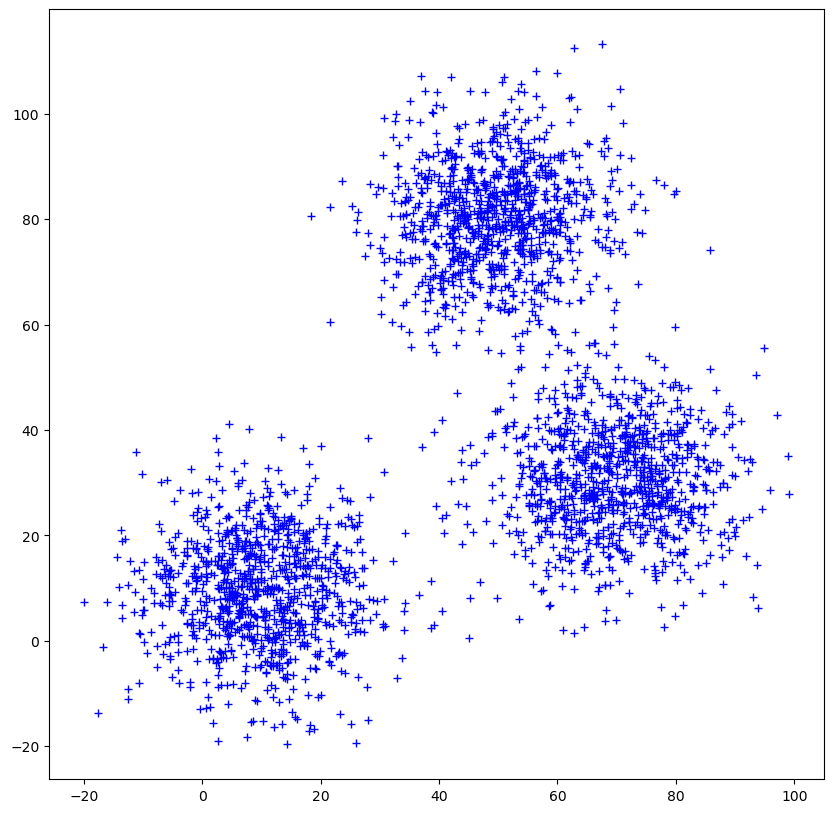

In [10]:
figsize(10,10)
plot(data[:,0], data[:,1], 'b+')

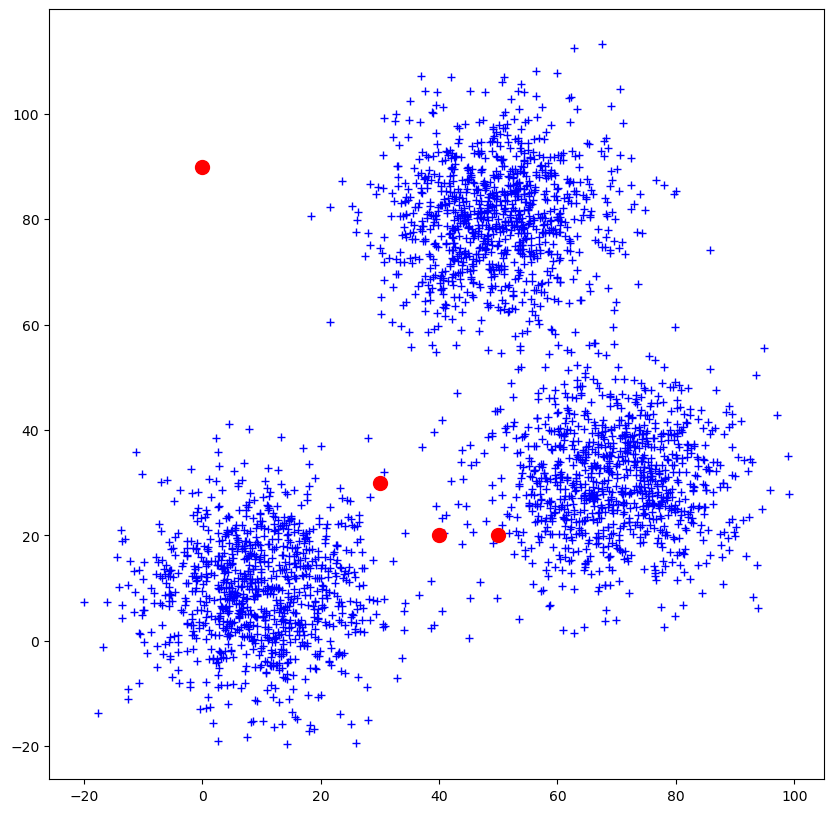

In [12]:
protos = array([[30,30], [40,20], [0,90], [50,20]]) # initialize centroids
start = protos.copy()

figsize(10,10)
plot(data[:,0], data[:,1], 'b+')
plot(protos[:,0], protos[:,1], 'ro', markersize=10)

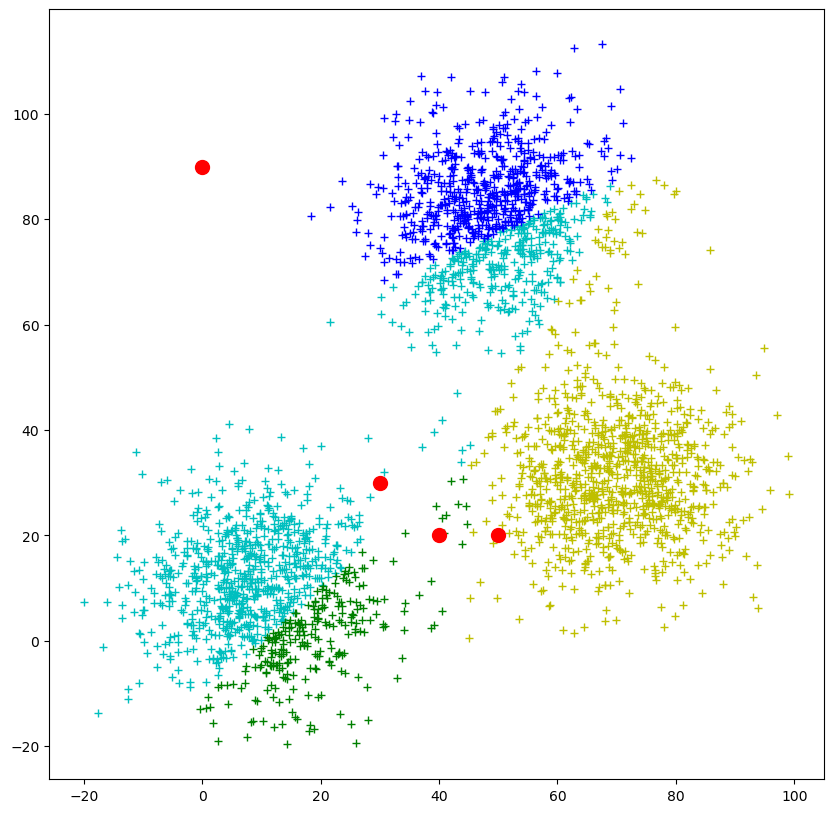

In [13]:
# now we compute the assignment of the data points to the prototypes(array closest)
figsize(10,10)
dists = cdist(protos, data)
closest = argmin(dists, axis=0)
for i in range (len(protos)):
    plot(data[closest==i,0], data[closest==i,1], ['c+', 'g+', 'b+', 'y+', 'r+'][i])
plot(protos[:,0], protos[:,1], 'ro', markersize=10)

In [14]:
history = [protos.copy()]

for i in range(len(protos)):
    protos[i, :] = average(data[closest==i], axis=0)
    
history.append(protos.copy)

C:\Users\charles\AppData\Local\Temp\ipykernel_5752\463446741.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  harray = array(history)


IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

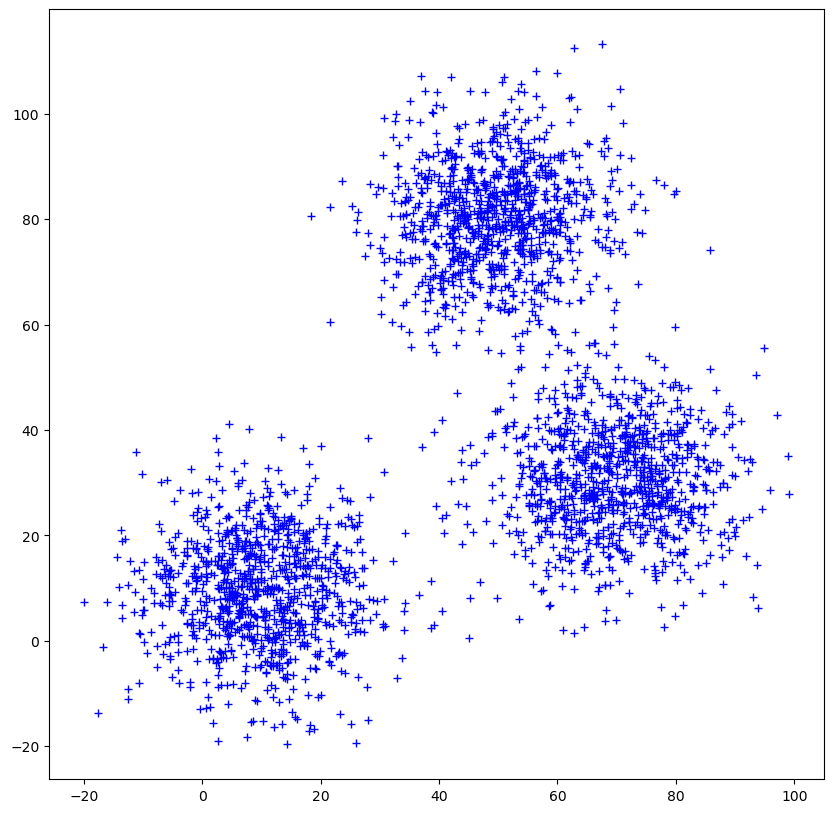

In [15]:
# recompute the location of the centres
figsize(10,10)
plot(data[:,0], data[:,1], 'b+')
harray = array(history)
for i in range(len(protos)):
    plot(harray[:,i,0], harray[:,i,1], 'r')
plot(harray[0,:,0], harray[0,:,1], 'ko', markersize=10)
plot(protos[:,0],protos[:,1], 'ro', markersize=10)